In [1]:
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans


In [2]:
# k = no of clusters 
k = 3

In [9]:
# for iris.csv
iris = load_iris()

feature_names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
target_names = ['Species']

X = pd.DataFrame(iris.data  , columns = feature_names)
y = iris.target

In [4]:
# for wine.csv
wine = pd.read_csv("../csv_datasets/wine.csv")

feature_names = ['Alcohol','Malic.acid','Ash','Acl','Mg','Phenols','Flavanoids','Nonflavanoid.phenols','Proanth','Color.int','Hue','OD','Proline']
target_names = ["Wine"]

X = wine.drop('Wine', axis = 1)
y = wine['Wine']

In [5]:
# strokes dataset
strokes = pd.read_csv("../csv_datasets/strokes.csv")
strokes_processed = pd.get_dummies(strokes, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

feature_names = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','smoking_status']
target_names = ['stroke']

y = strokes_processed['stroke']
X = strokes_processed.drop(['stroke', 'bmi'], axis = 1)

In [10]:
def analyze_plot(clusters, title) :
    # lableing the data 
    labels = np.zeros_like(clusters)
    for i in range(k):
        cat = (clusters == i)
        labels[cat] = mode(y[cat])[0]

    # finding accuracy 
    acc = accuracy_score(y, labels)
    print(f"{title} model analysis\naccuracy : {acc}")

    # visualizing the result
    plt.figure(figsize = (10, 10)) # 10 * 10 grid
    colormap = np.array(['red', 'green', 'blue', 'yellow'])

    # subplot ( x - axis length , y - axis length , position )
    # scatter (x - axis values , y - axis values, c = color)
    a = 0
    b = 1
    
    plt.subplot(2, 2, 1)
    plt.scatter(X[feature_names[a]],X[feature_names[b]],c = colormap[y - 1],s =40)
    plt.title('Real CLusters')
    plt.xlabel(feature_names[a])
    plt.ylabel(feature_names[b])

    plt.subplot(2,2,2)
    plt.scatter(X[feature_names[a]],X[feature_names[b]],c = colormap[clusters],s =40)
    plt.title(title + ' CLusters')
    plt.xlabel(feature_names[a])
    plt.ylabel(feature_names[b])
    plt.show()

KMeans model analysis
accuracy : 0.8933333333333333


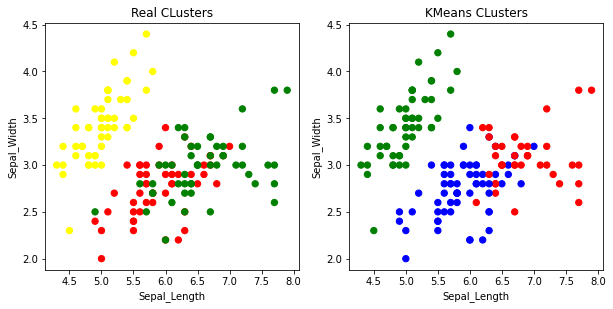

In [11]:
# KMeans 
kmeans = KMeans(n_clusters = k)
clusters = kmeans.fit_predict(X)

analyze_plot(clusters, "KMeans")

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.0218490

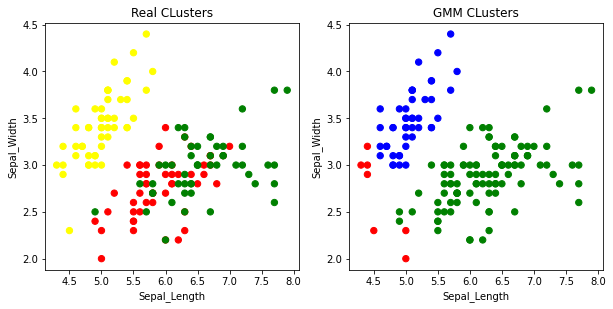

In [13]:
# GMM
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaler_X = scaler.transform(X)

SX = pd.DataFrame(scaler_X, columns = X.columns)
print(X)
print(scaler_X)

gmm = GMM(n_components = k)
gmm.fit(SX)
clusters = gmm.predict(SX)

analyze_plot(clusters, "GMM")